In [90]:
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'1780135_HCI_Assignment_01 (1).doc'
'1780135_HCI_Assignment_01 (2).doc'
'1780135_HCI_Assignment_01 (3).doc'
 1780135_HCI_Assignment_01.doc
 Banking_System
 Classroom
'Colab Notebooks'
'Copy of Your Python Earning Potential Calculator (1).gsheet'
'Copy of Your Python Earning Potential Calculator.gsheet'
 Data-Open-Access4PLoS-One-master
'DCCN_LabTask_1.1 (1).ppt'
 DCCN_LabTask_1.1.ppt
 Fasahat_Khan_reg_no_1780135.doc
'Getting started.pdf'
'GPDC Version 1.1.zip'
'HCI Latest Trends Essay.docx'
 LMS-1.accdb
 LMS-1.pdf
 LMS.docx
 model23.h5
 model39.h5
 model619.h5
 model.h5
 modelLast.h5
 model_three_category.h5
 preprocessed_metadata_city42new.csv
'Project Samples'
 Resume.gdoc
 train
 train_2
 train.tar.gz
 train.tgz
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'


This is the Jupyter notebook version of the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*
The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!

In [91]:

!ls "/content/drive/My Drive"


'1780135_HCI_Assignment_01 (1).doc'
'1780135_HCI_Assignment_01 (2).doc'
'1780135_HCI_Assignment_01 (3).doc'
 1780135_HCI_Assignment_01.doc
 Banking_System
 Classroom
'Colab Notebooks'
'Copy of Your Python Earning Potential Calculator (1).gsheet'
'Copy of Your Python Earning Potential Calculator.gsheet'
 Data-Open-Access4PLoS-One-master
'DCCN_LabTask_1.1 (1).ppt'
 DCCN_LabTask_1.1.ppt
 Fasahat_Khan_reg_no_1780135.doc
'Getting started.pdf'
'GPDC Version 1.1.zip'
'HCI Latest Trends Essay.docx'
 LMS-1.accdb
 LMS-1.pdf
 LMS.docx
 model23.h5
 model39.h5
 model619.h5
 model.h5
 modelLast.h5
 model_three_category.h5
 preprocessed_metadata_city42new.csv
'Project Samples'
 Resume.gdoc
 train
 train_2
 train.tar.gz
 train.tgz
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

#dir = "/content/drive/My Drive/Data-Open-Access4PLoS-One-master"
#root_dir = listdir(dir)
#image_list, label_list = [], []

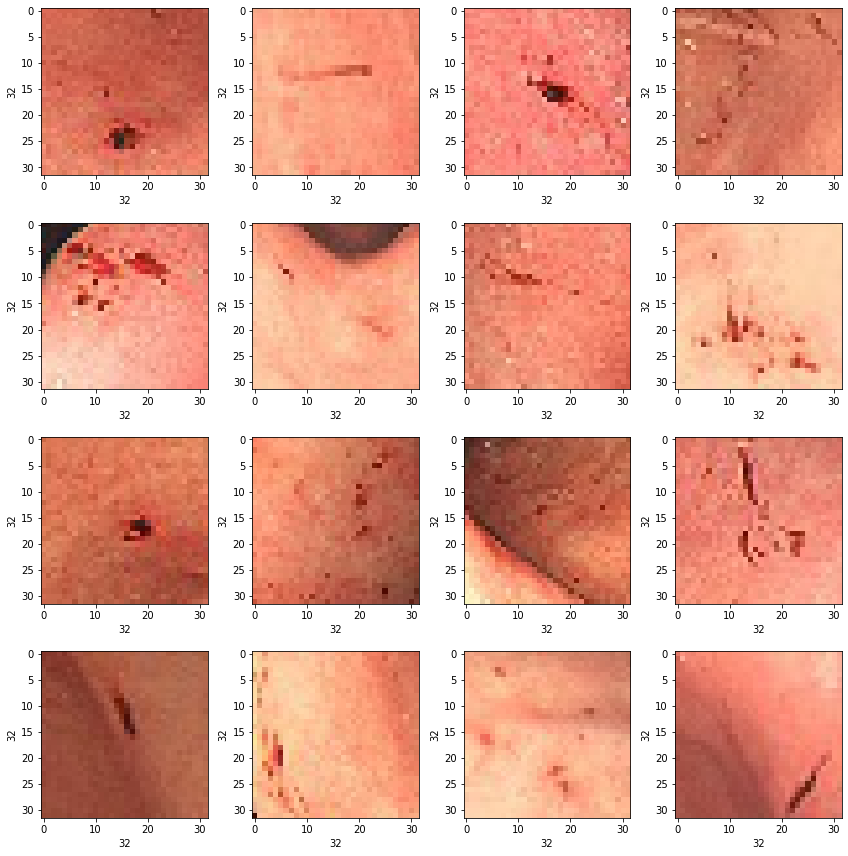

In [93]:
 
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/train/Erosion"
for i in range(1,17):
     plt.subplot(4,4,i)
     plt.tight_layout()
     rand_img = imread(path+'/'+random.choice(sorted(listdir(path))))
     plt.imshow(rand_img)
     plt.xlabel(rand_img.shape[1], fontsize = 10)
     plt.ylabel(rand_img.shape[0], fontsize = 10)
      

In [94]:
dir = "/content/drive/My Drive/train"
root_dir = listdir(dir)
image_list, label_list = [], []


In [95]:
from keras.preprocessing import image
import cv2

# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    #image2 = image.load_img(image_path, target_size=(32,32))
    image = cv2.imread(image_path)
    try:
      resized=cv2.resize(image,(32,32))
      #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
    except Exception as e:
      print('Exception:',e)
    image = img_to_array(resized)
    image_list.append(image)
    label_list.append(directory) 

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [96]:
label_counts = pd.DataFrame(label_list).value_counts() 
label_counts

Ulcer      943
Polyp      916
Erosion    910
dtype: int64

In [97]:
num_classes = len(label_counts)
num_classes

3

In [98]:
image_list[0].shape


(32, 32, 3)

In [99]:
label_list = np.array(label_list)
label_list.shape

(2769,)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.1, random_state=10)


In [101]:
x_train = np.array(x_train).astype('float16') / 255.0
x_test = np.array(x_test,dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)


In [102]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)


['Erosion' 'Polyp' 'Ulcer']


In [103]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [104]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding="same",input_shape=(32,32,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 32)          4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [105]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(0.0005),metrics=['accuracy'])

In [106]:
#training the model
epochs = 700
batch_size = 128
history = model.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_val,y_val))


Epoch 1/700
16/16 [==============================] - 1s 29ms/step - loss: 1.1034 - accuracy: 0.3398 - val_loss: 1.0941 - val_accuracy: 0.3267
Epoch 2/700
16/16 [==============================] - 0s 7ms/step - loss: 1.0948 - accuracy: 0.3448 - val_loss: 1.0900 - val_accuracy: 0.3587
Epoch 3/700
16/16 [==============================] - 0s 8ms/step - loss: 1.0887 - accuracy: 0.3832 - val_loss: 1.0873 - val_accuracy: 0.4208
Epoch 4/700
16/16 [==============================] - 0s 7ms/step - loss: 1.0827 - accuracy: 0.4117 - val_loss: 1.0804 - val_accuracy: 0.5351
Epoch 5/700
16/16 [==============================] - 0s 7ms/step - loss: 1.0780 - accuracy: 0.4647 - val_loss: 1.0720 - val_accuracy: 0.5150
Epoch 6/700
16/16 [==============================] - 0s 7ms/step - loss: 1.0643 - accuracy: 0.5370 - val_loss: 1.0584 - val_accuracy: 0.4770
Epoch 7/700
16/16 [==============================] - 0s 7ms/step - loss: 1.0496 - accuracy: 0.5190 - val_loss: 1.0508 - val_accuracy: 0.4790
Epoch 8/700


In [107]:
scores =  model.evaluate(x_test,y_test)
print(f"Test Accuracy : {scores[1]*100}")

9/9 [==============================] - 0s 3ms/step - loss: 0.7577 - accuracy: 0.8520
Test Accuracy : 85.19855737686157


In [108]:
model.save('/content/drive/My Drive/model_three_category_final.h5')

In [109]:
y_pred = model.predict(x_test)

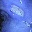

In [110]:
img = array_to_img(x_test[5])
img

In [111]:
labels = lb.classes_
print(labels)
print('Original : ',labels[np.argmax(y_test[5])])
print('Predicted : ',labels[np.argmax(y_pred[5])])

print('Original : ',labels[np.argmax(y_test[1])])
print('Predicted : ',labels[np.argmax(y_pred[1])])

print('Original : ',labels[np.argmax(y_test[6])])
print('Predicted : ',labels[np.argmax(y_pred[6])])

print('Original : ',labels[np.argmax(y_test[4])])
print('Predicted : ',labels[np.argmax(y_pred[4])])

print('Original : ',labels[np.argmax(y_test[2])])
print('Predicted : ',labels[np.argmax(y_pred[2])])

print('Original : ',labels[np.argmax(y_test[3])])
print('Predicted : ',labels[np.argmax(y_pred[3])])


print('Original : ',labels[np.argmax(y_test[7])])
print('Predicted : ',labels[np.argmax(y_pred[7])])

print('Original : ',labels[np.argmax(y_test[8])])
print('Predicted : ',labels[np.argmax(y_pred[8])])

print('Original : ',labels[np.argmax(y_test[9])])
print('Predicted : ',labels[np.argmax(y_pred[9])])






['Erosion' 'Polyp' 'Ulcer']
Original :  Ulcer
Predicted :  Polyp
Original :  Polyp
Predicted :  Polyp
Original :  Ulcer
Predicted :  Ulcer
Original :  Ulcer
Predicted :  Ulcer
Original :  Erosion
Predicted :  Erosion
Original :  Erosion
Predicted :  Polyp
Original :  Erosion
Predicted :  Erosion
Original :  Ulcer
Predicted :  Ulcer
Original :  Polyp
Predicted :  Polyp


In [117]:
from sklearn import metrics


pred_y = np.argmax(y_pred, axis=1)

test_y = np.argmax(y_test, axis=1)


# Print the confusion matrix
print(metrics.confusion_matrix(test_y, pred_y))

[[72  9  5]
 [ 5 90  7]
 [ 4 11 74]]


In [119]:
print(metrics.classification_report(test_y, pred_y, digits=3))

              precision    recall  f1-score   support

           0      0.889     0.837     0.862        86
           1      0.818     0.882     0.849       102
           2      0.860     0.831     0.846        89

    accuracy                          0.852       277
   macro avg      0.856     0.850     0.852       277
weighted avg      0.854     0.852     0.852       277

